# Very Simple Regression

## 1) IMPORT LIBRARIES AND DATASETS

In [1]:
# Import Pkgs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read the csv file 
dataframe = pd.read_csv('pH-Bicarbonate.csv')

In [7]:
dataframe.tail()

,pH_of_the_Water,Bicarbonates
29,8.5,48
30,7.8,147
31,6.7,117
32,7.1,182
33,7.3,87


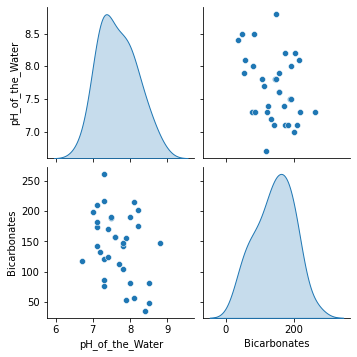

In [6]:
sns.pairplot(dataframe, diag_kind="kde")

In [8]:
print(f"the dataset has {dataframe.shape[0]} rows and {dataframe.shape[1]} columns")

the dataset has 34 rows and 2 columns


In [9]:
# Check the minimum Bicarbonate value
dataframe['Bicarbonates'].min()

35

## 2) EDA and Visualizations

In [14]:
# check if there are any Null values
print(dataframe.isnull().sum())
dataframe = dataframe.dropna() # removes any Null values

pH_of_the_Water    0
Bicarbonates       0
dtype: int64


In [11]:
# Check the dataframe info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pH_of_the_Water  34 non-null     float64
 1   Bicarbonates     34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


In [15]:
# Statistical summary of the dataframe
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pH_of_the_Water,34.0,7.661765,0.501522,6.7,7.3,7.6,8.0,8.8
Bicarbonates,34.0,142.794118,55.787356,35.0,107.0,147.0,186.5,262.0


In [20]:
outliers = []
def detect_outliers_zscore(dataframe):
    thres = 3
    mean = np.mean(dataframe)
    std = np.std(dataframe)
    # print(mean, std)
    for i in dataframe:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

sample_outliers_X = detect_outliers_zscore(dataframe['pH_of_the_Water'])
sample_outliers_Y = detect_outliers_zscore(dataframe['Bicarbonates'])
print(f"Outliers in '{dataframe.columns[0]}' column from Z-scores method: {len(sample_outliers_X)}")
print(f"Outliers in '{dataframe.columns[1]}' column from Z-scores method: {len(sample_outliers_Y)}")

Outliers in 'pH_of_the_Water' column from Z-scores method: 0
Outliers in 'Bicarbonates' column from Z-scores method: 0


In [24]:
# number of pH of the Water corresponding to Bicarbonates with maximim value (pH)
max = dataframe[dataframe['pH_of_the_Water'] == dataframe['pH_of_the_Water'].max()]
max



,pH_of_the_Water,Bicarbonates
31,6.7,117


In [25]:
# number of pH of the Water corresponding to Bicarbonates with minimum value (pH)
min = dataframe[dataframe['pH_of_the_Water'] == dataframe['pH_of_the_Water'].min()]
min

,pH_of_the_Water,Bicarbonates
31,6.7,117


array([[<AxesSubplot:title={'center':'pH_of_the_Water'}>,
        <AxesSubplot:title={'center':'Bicarbonates'}>]], dtype=object)

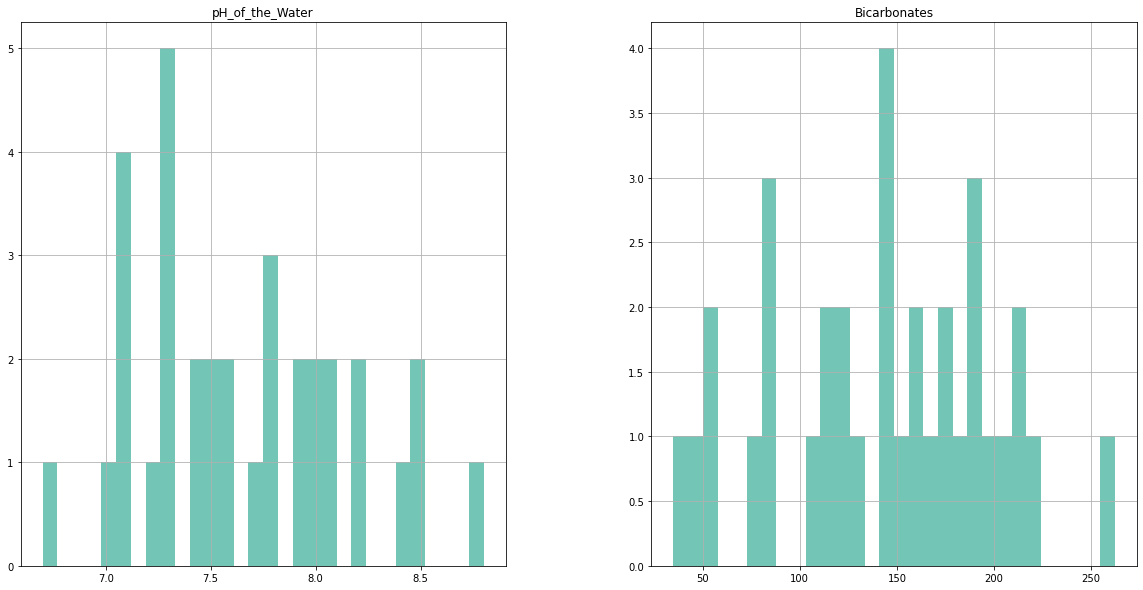

In [30]:
# Histogram Plotting (Data Distribution)
dataframe.hist(bins = 30, figsize = (20,10), color = '#73C6B6')

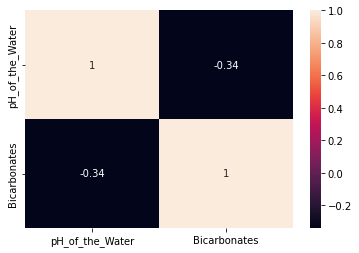

In [32]:
# Correlation Matrix
corr_matrix = dataframe.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

<AxesSubplot:xlabel='pH_of_the_Water', ylabel='Bicarbonates'>

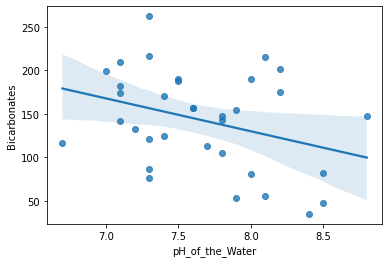

In [34]:
# Regression Plot with Seaborn (straight line fit between "pH_of_the_Water" and "Bicarbonates")
sns.regplot(x='pH_of_the_Water',y='Bicarbonates',data=dataframe)

## 3) TRAINING AND TESTING DATA

In [35]:
X = dataframe[['pH_of_the_Water']]
y = dataframe[['Bicarbonates']]

In [37]:
X.tail()

,pH_of_the_Water
29,8.5
30,7.8
31,6.7
32,7.1
33,7.3


In [38]:
y.tail()

,Bicarbonates
29,48
30,147
31,117
32,182
33,87


In [39]:
X.shape

(34, 1)

In [40]:
y.shape

(34, 1)

In [41]:
X = np.array(X) 
y = np.array(y)

In [42]:
X.shape

(34, 1)

In [43]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=72)

In [44]:
X_train.shape

(30, 1)

In [45]:
X_test.shape

(4, 1)

In [50]:
print(X[-5:])   # last 5 values of X Numpy Array

[[8.5]
 [7.8]
 [6.7]
 [7.1]
 [7.3]]


In [ ]:
# We can see that data have been shuffled by "train_test_split
X_train

Text(0.5, 1.08, 'Testing Data')

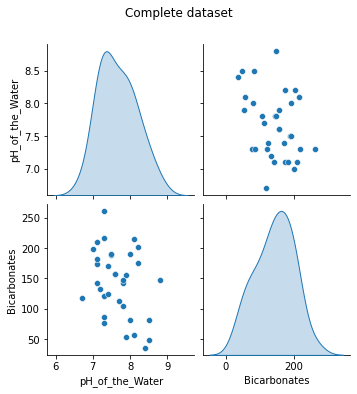

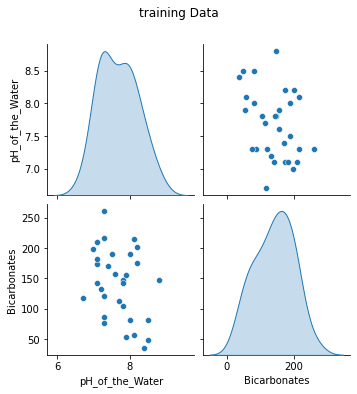

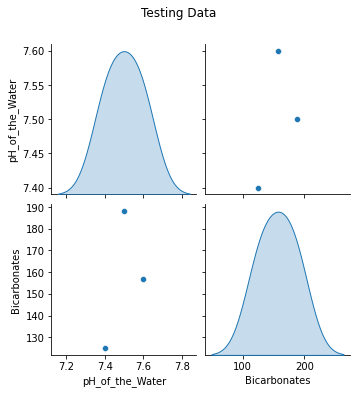

In [64]:
train_dataset_plot = dataframe.sample(frac=0.9, random_state=0)
test_dataset_plot = dataframe.drop(train_dataset_plot.index)



dataset_plot = sns.pairplot(dataframe, diag_kind='kde')
dataset_plot.fig.suptitle("Complete dataset", y=1.08)

train_dataplot = sns.pairplot(train_dataset_plot, diag_kind='kde')
train_dataplot.fig.suptitle("training Data", y=1.08)

test_dataplot = sns.pairplot(test_dataset_plot, diag_kind='kde')
test_dataplot.fig.suptitle("Testing Data", y=1.08)

## 4) Train a Linear Regression Model

In [51]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(fit_intercept = True) # Fit intercept is the "b" parameter (y = b + mx)
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
# Checking the accuracy
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse

2306.9939707107164

In [53]:
print('Linear Model Coefficient (m): ', lr.coef_)
print('Linear Model Coefficient (b): ', lr.intercept_)

Linear Model Coefficient (m):  [[-38.16593316]]
Linear Model Coefficient (b):  [435.18379886]


## 5) EVALUATE TRAINED MODEL PERFORMANCE

In [54]:
y_pred

array([[168.02226677],
       [148.93930019],
       [156.57248682],
       [137.48952024]])

Text(0.5, 1.0, 'pH of the Water Vs. Bicarbonates')

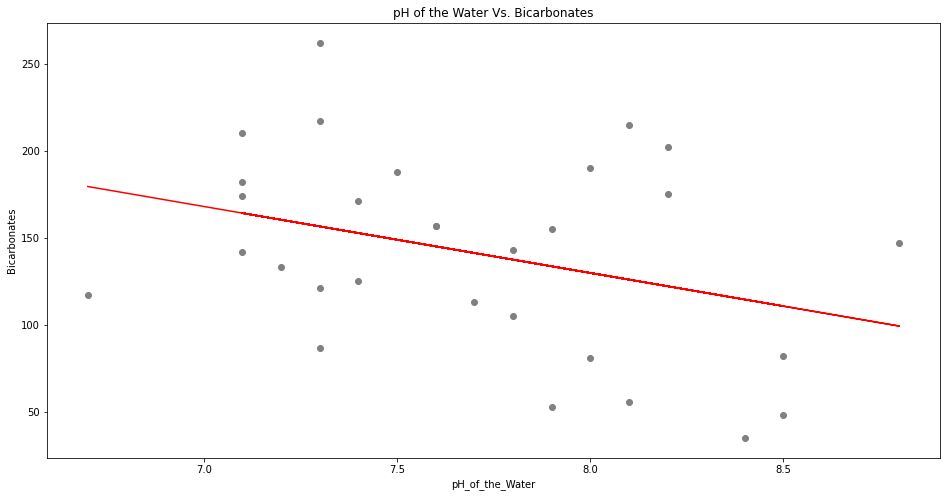

In [56]:
# Plotting the TRAIN DATA
plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.ylabel('Bicarbonates')
plt.xlabel('pH_of_the_Water')
plt.title('pH of the Water Vs. Bicarbonates')

## 6) Making Predictions
 - Use the trained model to obtain the Bicarbonates if the water has 7.8 pH

In [61]:
new_value = [[7.8]]
new_prediction = lr.predict(new_value)
new_prediction

array([[137.48952024]])

## 7) Save the Model

In [62]:
import joblib

model_file = open("SimpleLinearRegression-20K45A0215(ph_vs_bicar).pkl","wb")
joblib.dump(lr,model_file)
model_file.close()